<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/Houseprice.jpg.jpg">
  </body>
</html>

# **About Dataset**
## Dataset Description:
The dataset contains information about properties. Each property has a unique property ID and is associated with a location ID based on the subcategory of the city. The dataset includes the following attributes:

- **Property ID**: Unique identifier for each property.
- **Location ID**: Unique identifier for each location within a city.
- **Page URL**: The URL of the webpage where the property was published.
- **Property Type**: Categorization of the property into six types: House, FarmHouse, Upper Portion, Lower Portion, Flat, or Room.
- **Price**: The price of the property, which is the dependent feature in this dataset.
- **City**: The city where the property is located. The dataset includes five cities: Lahore, Karachi, Faisalabad, Rawalpindi, and Islamabad.
- **Province**: The state or province where the city is located.
- **Location**: Different types of locations within each city.
- **Latitude and Longitude**: Geographic coordinates of the cities.
## Steps Involved in the Analysis:

**Statistical Analysis:**

- Data Types: Determine the data types of the attributes.
- Level of Measurement: Identify the level of measurement for each attribute.
- Summary Statistics: Calculate mean, standard deviation, minimum, and maximum values for numerical attributes.
Data Cleaning:

- Filling Null Values: Handle missing values in the dataset.
- Duplicate Values: Remove duplicate records, if any.
- Correcting Data Types: Ensure the correct data types for each attribute.
- Outliers Detection: Identify and handle outliers in the data.
- Exploratory Data Analysis (EDA):

Visualization:
- Use libraries such as Seaborn, Matplotlib, and Plotly to visualize the data and gain insights.

Model Building:
- Libraries: Utilize libraries like Sklearn and pickle.
- List of Models: Build models using Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbors (KNN), XG Boost, Gradient Boost, and Ada Boost.
- Model Saving: Save the selected model into a pickle file for future use.
I hope this captures the essence of the provided information. Let me know if you need any further assistance!

---
- About the Author : Sajjad Ali Shah
- Date :
- Dataset (Kaggle)[https://www.kaggle.com/datasets/jillanisofttech/pakistan-house-price-dataset?select=zameen-updated.csv]
---

In [40]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


In [41]:
#Load dataset through pandas
df=pd.read_csv("zameen-updated.csv")

In [42]:
#load first 5 dataset 
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [68]:
df["bedrooms"].max

<bound method Series.max of 0         2
1         3
2         5
3         4
4         3
         ..
168441    6
168442    3
168443    6
168444    3
168445    3
Name: bedrooms, Length: 168446, dtype: int64>

In [56]:
#shape of the dataset
print(f"The number of Rows in a dataset is {df.shape[0]}")
print(f"The number of columns in a dataset is {df.shape[1]}")

The number of Rows in a dataset is 168446
The number of columns in a dataset is 20


In [44]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


# **Data cleaning and preprocessing**

In [45]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

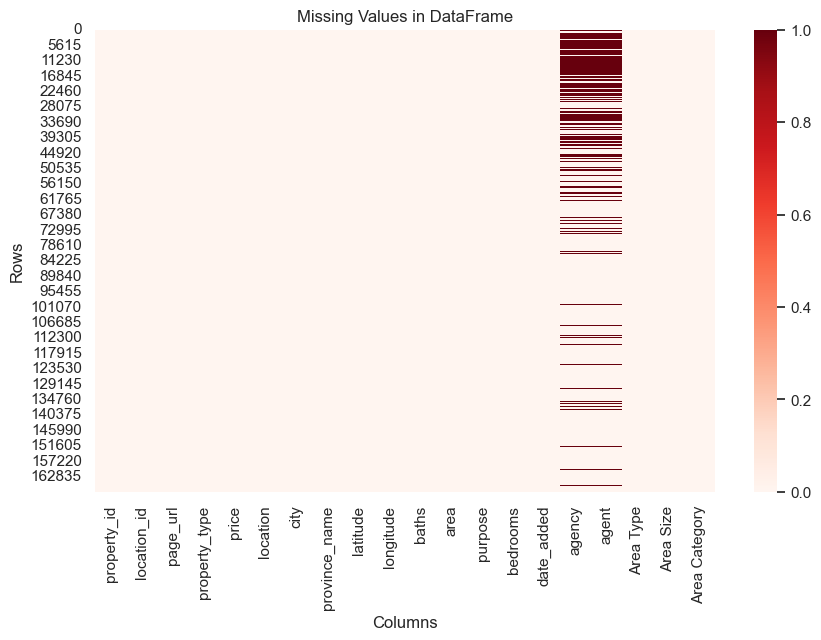

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='Reds')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()